# Froest Fire Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Upadated forest data.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day','month','year'], axis = 1 , inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 ,1)
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [7]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [8]:
# Independent and dependent features
X = df.drop(['FWI'], axis = 1)
Y = df['FWI']

In [9]:
X, Y

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
 0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
 1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
 2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
 3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
 4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
 238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
 239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
 240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
 241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
 242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1
 
 [243 rows x 11 columns],
 0      0.5
 1      0.4
 2      0.1


In [10]:
# train test split
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y, random_state=42 , test_size= 0.25)

In [11]:
# Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

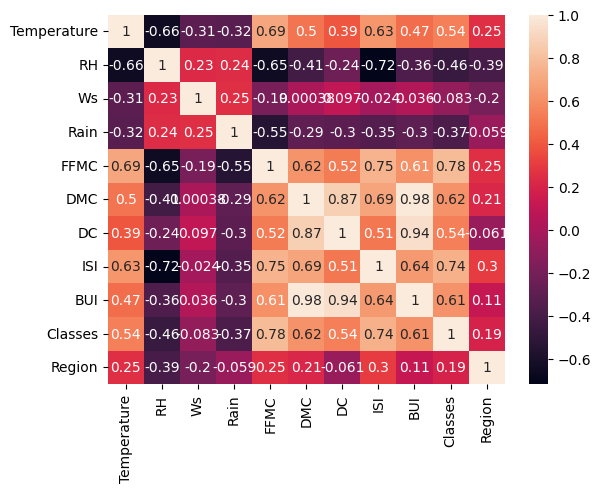

In [12]:
# Multicollinearity

plt.Figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True)
# annot = True parameter is used to show the values of the correlation in the heatmap


# Multicollinearity

- When two or more independent features are highly correlated with each then that is called as multicollinearity
- The model gets cofused for which feature is contributing in prediction and get confused to give more weight to certain feature.
- Model tries to “explain” the same thing twice → results in unnecessary complexity → higher variance → overfitting.

In [13]:
# For getting the columns which are having high correlations

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [14]:
# The thershold is setup by the domain expert
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [15]:
X_train.drop(corr_features , axis = 1 , inplace= True)
X_test.drop(corr_features , axis = 1 , inplace= True)
X_train.shape , X_test.shape

((182, 9), (61, 9))

In [16]:
# Feature Scaling for standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 97            29  74  19   0.1  75.8   3.6   2.1        0       0
 141           31  72  14   0.2  60.2   3.8   0.8        0       1
 192           40  31  15   0.0  94.2  22.5  16.6        1       1
 68            32  60  18   0.3  77.1  11.3   2.2        0       0
 119           32  47  14   0.7  77.5   7.1   1.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   0.2        0       0
 14            28  80  17   3.1  49.4   3.0   0.4        0       0
 92            25  76  17   7.2  46.0   1.3   0.2        0       0
 179           34  59  16   0.0  88.1  19.5   7.4        1       1
 102           30  77  21   1.8  58.5   1.9   1.1        0       0
 
 [182 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
 24            31  64  15   0.0  86.7  14.2  5.7        1       0
 6             33  54  13   0.0  88.2

In [18]:
X_train_scaled , X_test_scaled

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]], shape=(182, 9)),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-

Text(0.5, 1.0, 'X_train after scaling')

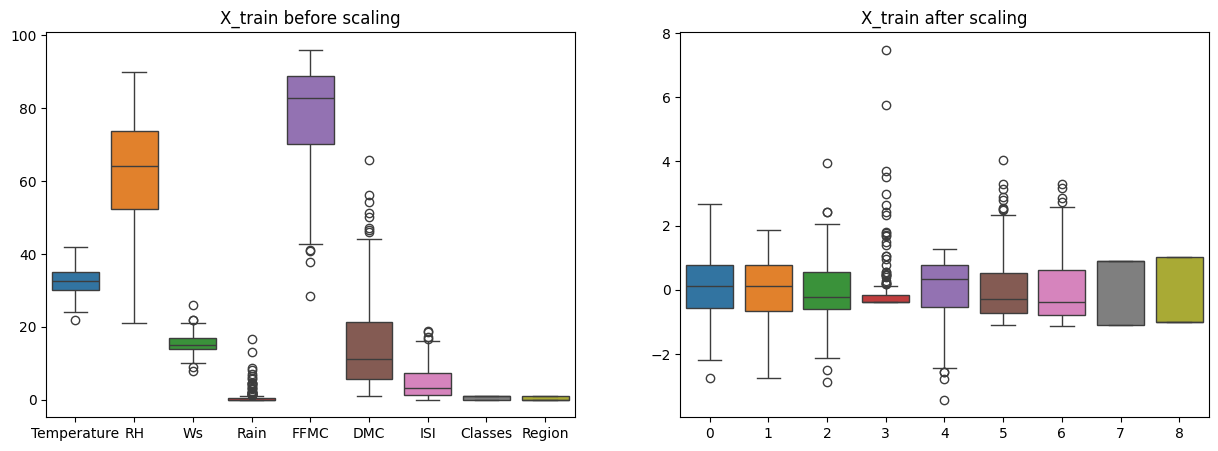

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")

# Model Training

Mean Absolute Error = 0.5468236465249978
R2 Score = 0.9847657384266951


Text(0.5, 1.0, 'Linear Regression')

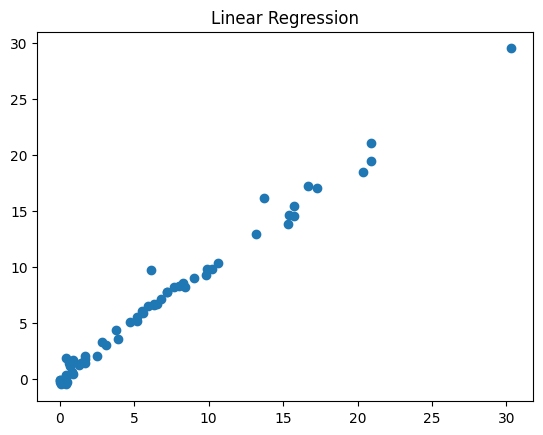

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,Y_train)
Y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print("Mean Absolute Error =",mae)
print("R2 Score =", score)
plt.scatter(Y_test,Y_pred)
plt.title("Linear Regression")

In [21]:
linreg.coef_ , linreg.intercept_

(array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
         3.6982583 ,  4.84057298,  0.40422124, -0.39259928]),
 np.float64(7.156043956043957))

------------------------------------------------------------------------------------------------------------------------------------------------

# Lasso Regression

Mean Absolute Error = 1.133175994914409
R2 Score = 0.9492020263112388


Text(0.5, 1.0, 'L1 Regularization')

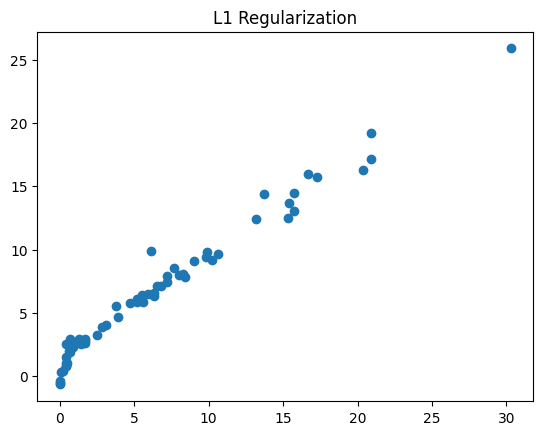

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lassoreg = Lasso()
lassoreg.fit(X_train_scaled,Y_train)
Y_pred = lassoreg.predict(X_test_scaled)
mae_lasso = mean_absolute_error(Y_test,Y_pred)
score_lasso = r2_score(Y_test,Y_pred)
print("Mean Absolute Error =",mae_lasso)
print("R2 Score =", score_lasso)
plt.scatter(Y_test,Y_pred)
plt.title("L1 Regularization")

In [23]:
lassoreg.coef_ , lassoreg.intercept_

(array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
         2.99025157,  4.00824747,  0.        , -0.        ]),
 np.float64(7.156043956043957))

# Cross Validation Lasso
- K-fold Cross Validation is used

In [24]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
# if we don't give the cv value then by default it will take 5 fold
lassocv.fit(X_train_scaled,Y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [25]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [26]:
# On this many lambda values the system tried to configure from which the best value of alpha is used to predict and to evaluate the model
# By default the alpha values is setted to the 100 so there are 100 differnet values of the alpha on which the model tried and checked to find the best value
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [27]:
# This is the best lembda coeffecient of the penality term which is added to the cost function for the lasso Regularization
lassocv.alpha_

np.float64(0.05725391318234408)

In [28]:
# This is the mean squared error for every path / or the every value of the aplha
# Now this will be total about 500 mse's because there are 100 differnet values of alpha and 5 cross validation steps to calculated the best one
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error = 0.619970115826343
R2 Score = 0.9820946715928275


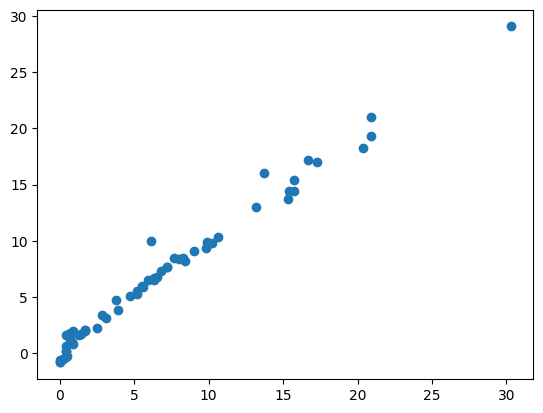

In [29]:
Y_pred_lassocv = lassocv.predict(X_test_scaled)

mae_lassocv = mean_absolute_error(Y_test , Y_pred_lassocv)
score_lassocv = r2_score(Y_test,Y_pred_lassocv)
print("Mean Absolute Error =",mae_lassocv)
print("R2 Score =",score_lassocv)
plt.scatter(Y_test,Y_pred_lassocv)

----------------------------------------------------------------------------------------------------

# Ridge Regression

Mean Absolute Error = 0.5642305340105715
R2 Score = 0.9842993364555512


Text(0.5, 1.0, 'L2 Regularization')

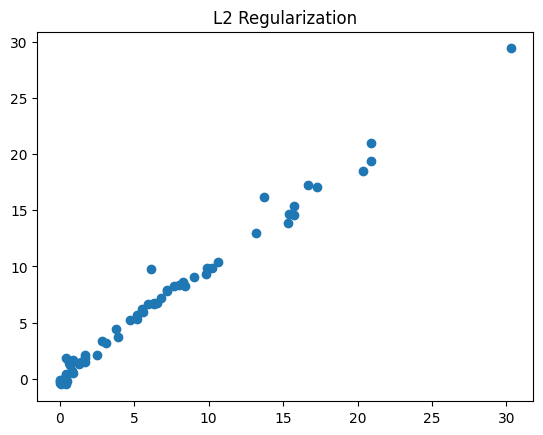

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
Rigreg = Ridge()
Rigreg.fit(X_train_scaled,Y_train)
Y_pred = Rigreg.predict(X_test_scaled)
mae_Rig = mean_absolute_error(Y_test,Y_pred)
score_Rig = r2_score(Y_test,Y_pred)
print("Mean Absolute Error =",mae_Rig)
print("R2 Score =", score_Rig)
plt.scatter(Y_test,Y_pred)
plt.title("L2 Regularization")

In [31]:
Rigreg.coef_ , Rigreg.intercept_

(array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
         3.68286744,  4.74488835,  0.43423672, -0.38466214]),
 np.float64(7.156043956043957))

# Ridge Cross validation
- Leave One Out Cross Validation is Used.

In [32]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)

ridgecv.fit(X_train_scaled,Y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [33]:
Y_pred_ridgecv = ridgecv.predict(X_test_scaled)
Y_pred_ridgecv

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

In [34]:
# it will take 0.1 to 1.0 and it will take any 10 values between them to evaluate the best
ridgecv.alphas , ridgecv.alpha_ 

((0.1, 1.0, 10.0), np.float64(1.0))

In [35]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Mean Absolute Error = 0.5642305340105715
R2 Score = 0.9842993364555512


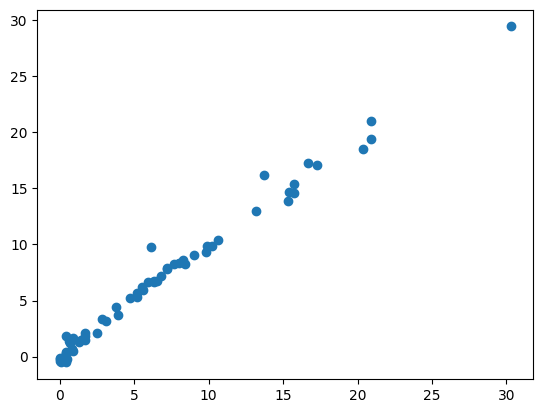

In [36]:
mae_ridgecv = mean_absolute_error(Y_test,Y_pred_ridgecv)
score_ridgecv = r2_score(Y_test,Y_pred_ridgecv)
print("Mean Absolute Error =",mae_ridgecv)
print("R2 Score =",score_ridgecv)
plt.scatter(Y_test,Y_pred_ridgecv)

--------------------------------------------------------------------------------------------------------------------

# Elastic Net Regression

Mean Absolute Error = 1.8822353634896005
R2 Score = 0.8753460589519703


Text(0.5, 1.0, 'Elastic Net Regression')

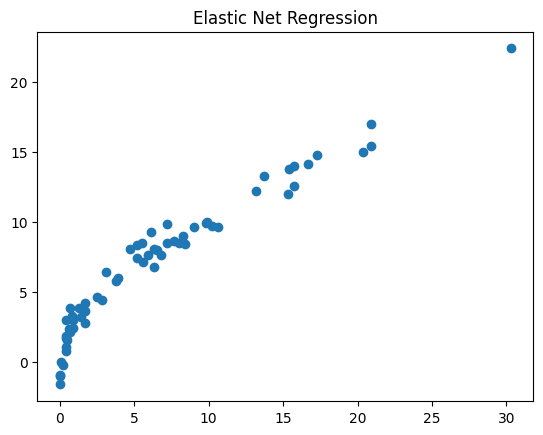

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
Elareg = ElasticNet()
Elareg.fit(X_train_scaled,Y_train)
Y_pred = Elareg.predict(X_test_scaled)
mae_ela = mean_absolute_error(Y_test,Y_pred)
score_ela = r2_score(Y_test,Y_pred)
print("Mean Absolute Error =",mae_ela)
print("R2 Score =", score_ela)
plt.scatter(Y_test,Y_pred)
plt.title("Elastic Net Regression")

In [38]:
Elareg.coef_ , Elareg.intercept_

(array([ 0.21700498, -0.46785751,  0.        , -0.        ,  0.37217213,
         2.36758116,  2.35779601,  0.87026661,  0.        ]),
 np.float64(7.156043956043956))

# Elastic Net Cross Validation

In [39]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled,Y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [40]:
Y_pred_elasticcv = elasticcv.predict(X_test_scaled)
Y_pred_elasticcv

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

In [41]:
elasticcv.alphas_ , elasticcv.alpha_

(array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
         9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
         7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
         4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
         3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
         2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
         1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
         1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
         0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
         0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
         0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
         0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
         0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
         0.15137261,  0.1411706 ,  0.13165617,  0.1

In [42]:
elasticcv.mse_path_

array([[53.99690233, 65.39074075, 54.89628985, 77.90299066, 43.34226941],
       [52.57580575, 64.62234745, 53.744793  , 77.60921421, 42.30310502],
       [51.11104709, 62.99703302, 52.17649022, 76.53887034, 41.00613837],
       [49.61037668, 61.26183674, 50.57039748, 74.67053859, 39.67994098],
       [48.07677137, 59.48562789, 48.86189586, 72.53190776, 38.32743244],
       [46.08919463, 57.21227804, 46.85067587, 69.99343362, 36.64273851],
       [43.93304229, 54.81307   , 44.65826477, 67.19431714, 34.65787048],
       [41.80546452, 52.43573064, 42.39238637, 64.39190172, 32.6541552 ],
       [39.71309973, 50.06862734, 40.16732063, 61.6188179 , 30.67748611],
       [37.63649808, 47.60730813, 37.96880498, 58.88319233, 28.76304656],
       [35.48905272, 45.2114555 , 35.74224936, 56.09403417, 26.91571606],
       [33.36370035, 42.89274496, 33.46771793, 53.24006353, 25.13971517],
       [31.29021796, 40.65450553, 31.2980323 , 50.46056554, 23.40823907],
       [29.31299261, 38.49931979, 29.2

Mean Absolute Error = 0.6575946731430898
R2 Score = 0.9814217587854941


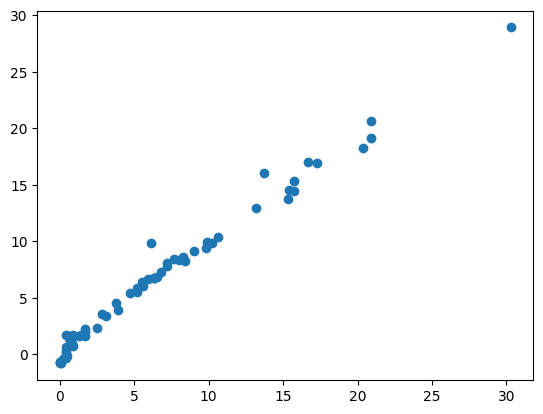

In [43]:
mae_elasticcv = mean_absolute_error(Y_test,Y_pred_elasticcv)
score_elasticcv = r2_score(Y_test,Y_pred_elasticcv)
print("Mean Absolute Error =",mae_elasticcv)
print("R2 Score =",score_elasticcv)
plt.scatter(Y_test,Y_pred_elasticcv)

--------------------------------------------------------------------------------------------------------------

# Pickle the best Regression model and preprocessing model StandardScaler For Depolying 

In [44]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [47]:
Rigreg

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [48]:
import pickle
pickle.dump(scaler , open("Standard_Scaler_Forest_Fire.pkl" , 'wb'))
pickle.dump(Rigreg , open("Ridge_Regression_Forest_Fire.pkl" , 'wb'))

In [49]:
Scaler = pickle.load(open("Standard_Scaler_Forest_Fire.pkl" , 'rb'))
Ridge_Model = pickle.load(open("Ridge_Regression_Forest_Fire.pkl" , 'rb'))

In [ ]:
Ridge_Model.predict(Scaler.transform(X_test))

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])